In [223]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB





In [164]:
df=pd.read_csv("WomensClothing.csv")

In [165]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [166]:
df.tail(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [167]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [168]:
df.shape

(23486, 11)

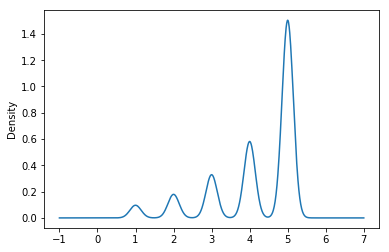

In [169]:
df.Rating.plot.density()

In [170]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [171]:
df=df.drop(columns=['Unnamed: 0','Recommended IND','Division Name','Positive Feedback Count',
       'Department Name', 'Class Name'])

In [172]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3


In [173]:
df=df.dropna(axis=0,how ='any')

In [174]:
df.head(3)

,Clothing ID,Age,Title,Review Text,Rating
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5


In [175]:
df.shape 

(19675, 5)

In [176]:
df.columns=['id','age','title','review','rating']

In [227]:
df.head(4)

,id,age,title,review,rating,review_clean,positivelyRated
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,"love, love, love this jumpsuit. it's fun, flir...",1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,this shirt is very flattering to all due to th...,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,"love tracy reese dresses, but this one is not ...",0
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,aded this in my basket at hte last mintue to s...,1


In [178]:
df['review'].iloc[1]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [179]:
df['review'].iloc[3]

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [233]:
def cleanpunc(sentence):
    '''This function cleans all the punctuation or special characters from a given sentence'''
    cleaned = re.sub(r'[?|@|!|^|%|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
cleanpunc('this dress is gorgeous yet sturdy, it is all about the lace. size regular fit my chest area well and like the midi look (i am waist, hips). whether regular or petite size, when walked or turned, the pleats added too much volume and looked overwhelming and no shape. tried it with belt and it looked better, but looked odd because the pleats poofed at the belt area. tried with sweater, jacket...then finally gave up. it would look gorgeous on tall thin gal.')

'this dress is gorgeous yet sturdy  it is all about the lace  size regular fit my chest area well and like the midi look  i am waist  hips   whether regular or petite size  when walked or turned  the pleats added too much volume and looked overwhelming and no shape  tried it with belt and it looked better  but looked odd because the pleats poofed at the belt area  tried with sweater  jacket   then finally gave up  it would look gorgeous on tall thin gal '

In [225]:
#def cleanhtml(sentence):
    '''This function removes all the html tags in the given sentence'''
    #cleanr = re.compile('<.*?>')    ## find the index of the html tags
    #cleantext = re.sub(cleanr, ' ', sentence)  ## Substitute <space> in place of any html tag
    #return cleantext

In [242]:
def cleanText(text):
    text=text.lower()
    text=text.split(' ')
    #text=cleanpunc(text)
    #text = re.sub(r'[?|@|!|^|%|\'|"|#]',r'',text)
    #text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    useless_words = list(string.punctuation)
    text = [x for x in text if x not in useless_words]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

df["review_clean"] = df["review"].apply(lambda x: cleanText(x))  
    

In [243]:
def cleanpunc(sentence):
    '''This function cleans all the punctuation or special characters from a given sentence'''
    cleaned = re.sub(r'[?|@|!|^|%|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
df["review_clean"] = df["review_clean"].apply(lambda x: cleanpunc(x))  
    

In [245]:
df["review_clean"].iloc[5]

'love this dress  usually get an xs but it runs little snug in bust so ordered up size  very flattering and feminine with the usual retailer flair for style '

In [19]:
#df = df.sample(frac = 0.1, replace = False, random_state=42)
df.shape

(1968, 6)

In [209]:
# Remove any 'neutral' ratings equal to 3
df = df[df['rating'] != 3]
# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated poorly)
df['positivelyRated'] = np.where(df['rating'] > 3, 1, 0)
df.head()

,id,age,title,review,rating,review_clean,positivelyRated
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,"love, love, love jumpsuit. fun, flirty, fabulo...",1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,shirt flattering due adjustable front tie. per...,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,"love tracy reese dresses, one not petite. feet...",0
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,aded basket hte last mintue see would look lik...,1
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,"ordered carbon store pick up, ton stuff (as al...",1


In [210]:
df['positivelyRated'].mean()

0.8808320260298647

In [246]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], 
                                                    df['positivelyRated'], 
                                                    random_state=0)

In [247]:
X_train.iloc[19]

'this dress is gorgeous yet sturdy  it is all about the lace  size regular fit my chest area well and like the midi look  i am waist  hips   whether regular or petite size  when walked or turned  the pleats added too much volume and looked overwhelming and no shape  tried it with belt and it looked better  but looked odd because the pleats poofed at the belt area  tried with sweater  jacket   then finally gave up  it would look gorgeous on tall thin gal '

# LogisticRegression- 1st Try

In [193]:
# Fit the CountVectorizer to the training data specifiying a minimum 
vect = CountVectorizer(min_df=5).fit(X_train)
X_train_vectorized = vect.transform(X_train)


In [194]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

s= accuracy_score(y_test, predictions)
s

0.9279572391354869

In [195]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))

[[ 318  196]
 [ 114 3675]]


# 2nd Try

In [133]:
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
X_train_vectorized = vect.transform(X_train)


In [134]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

s= accuracy_score(y_test, predictions)
s

0.8669724770642202

# 3rd Try

In [248]:
vec = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)


In [249]:
X_train_vectorized = vec.transform(X_train)
X_test_vectorized=vec.transform(X_test) 
model = LogisticRegression().fit(X_train_vectorized, y_train)
pred = model.predict(X_test_vectorized)
acc= accuracy_score(y_test, pred)
acc    

0.9388798512665583

# SVM

In [250]:
vect_svm = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect_svm.transform(X_train)
X_test_vectorized=vect_svm.transform(X_test)
clf=svm.SVC(kernel='linear')
clf.fit(X_train_vectorized , y_train)
pred_svm = clf.predict(X_test_vectorized)
acc_svm= accuracy_score(y_test, pred_svm)
acc_svm

0.9265628631187544

# Naive Bayes

In [207]:
vec_nb = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vec_nb.transform(X_train)
X_test_vectorized=vec_nb.transform(X_test)
clf_nb=MultinomialNB(alpha=0.1)
clf_nb.fit(X_train_vectorized,y_train)
pred_nb = clf.predict(X_test_vectorized)
acc_nb= accuracy_score(y_test, pred_nb)
acc_nb

0.9286544271438532

In [33]:
pos = df[df.positivelyRated == 1] 
pos_string=[]

for i in pos['review_clean']:
    pos_string.append(i)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

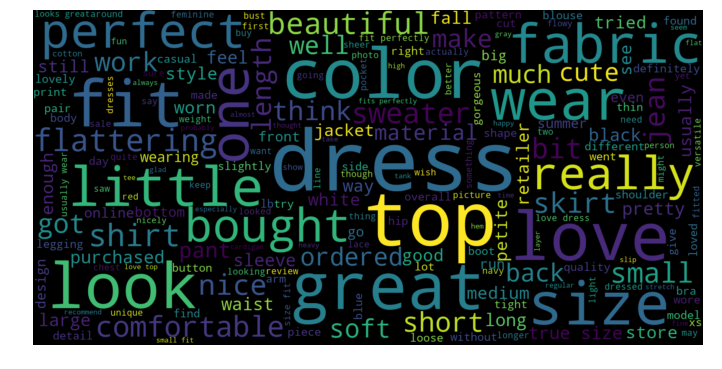

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
neg = df[df.positivelyRated == 0] 
neg_string=[]

for i in neg['review_clean']:
    neg_string.append(i)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

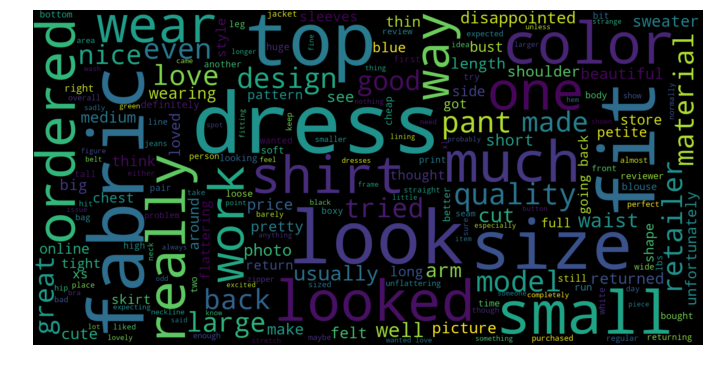

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [187]:
import pickle
pickle.dump(vec, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('classifier.pkl', 'wb'))

In [44]:
import pickle
pickle.dump(Logistic_regression(), open('sentiment.pkl', 'wb'))

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
modell=pickle.load(open("sentiment.pkl","rb"))

In [196]:
a= df['positivelyRated'] ==1
b=df['positivelyRated'] ==0
a.value_counts()

True     15160
False     2051
Name: positivelyRated, dtype: int64

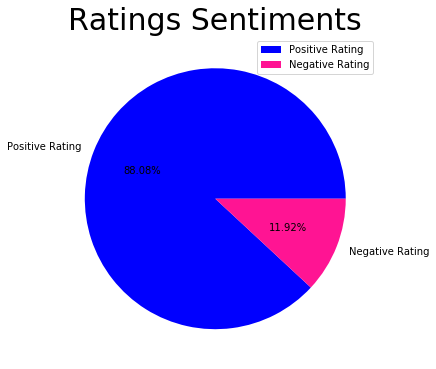

In [200]:

import numpy as np
import matplotlib.pyplot as plt
# a pie chart to represent the sentiments of the patients
size = [15160, 2051]
colors = ['blue', 'deeppink']
labels = "Positive Rating","Negative Rating" 

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Ratings Sentiments', fontsize = 30)
plt.legend()
plt.show()

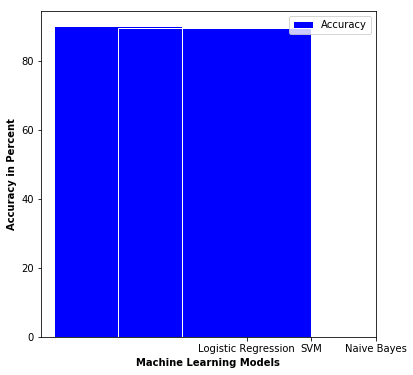

In [159]:

import numpy as np
import matplotlib.pyplot as plt
 

barWidth = 2

# set height of bar
lr = acc
svm =acc_svm
nb = acc_nb

bar = [lr * 100, svm * 100, nb * 100]
 
# Set position of bar on X axis
pos = np.arange(len(bar))
 
# Make the plot
plt.bar(pos, bar, color='b', width=barWidth, edgecolor='white', label='Accuracy')

 
# Add xticks on the middle of the group bars
plt.xlabel('Machine Learning Models', fontweight='bold')
plt.ylabel('Accuracy in Percent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar))], list(["Logistic Regression", "SVM", "Naive Bayes"]))
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [189]:
import requests

headers = {
    'Content-type': 'application/json',
}

data = '{"text":"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress."}'

response = requests.post('http://localhost:5004/sentiment', headers=headers,data=data)
print(response.text)

{
  "sentiment": "[0]", 
  "status_code": 200, 
  "text": "I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress."
}



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review_clean'],df['positivelyRated'], random_state=0)

def Logistic_regression():
    vec = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
    X_train_vectorized = vec.transform(X_train)
    X_test_vectorized=vect.transform(X_test) 
    model = LogisticRegression()
    model.fit(X_train_vectorized, y_train)
    pred = model.predict(X_test_vectorized)
    acc= accuracy_score(y_test, pred)
    
    return acc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['review_clean'],df['positivelyRated'], random_state=0)

def SVM():
    vec = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
    X_train_vectorized = vec.transform(X_train)
    X_test_vectorized=vect.transform(X_test)
     
    clf=svm.SVC(kernel='linear')
    clf.fit(X_train_vectorized , y_train)
    pred = clf.predict(X_test_vectorized)
    acc= accuracy_score(y_test, pred)
    
    return acc

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df['review_clean'],df['positivelyRated'], random_state=0)

def naiveBayes():
    vec = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
    X_train_vectorized = vec.transform(X_train)
    X_test_vectorized=vect.transform(X_test)
     
    clf=MultinomialNB(alpha=0.1)
    clf.fit(X_train_vectorized,y_train)
    pred = clf.predict(X_test_vectorized)
    acc= accuracy_score(y_test, pred)
    
    return acc

